## "Data vs. Disease: Understanding COVID-19"

                                                                                                  - Author: Deepak Tallapudi
  * Dataset is from: [Kaggle.com] (https://www.kaggle.com/)

#### Steps of project development:

- 1. read dataset
- 2. apply basic functions
- 3. data Cleaning
- 4. data Filtering
- 5. Grouping
- 6. Sorting
- 7. Aggregations(min,max,mean,mode,variance)
- 8. Data Visualization

In [31]:
## importing necessary libraries
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# To read the .csv file
df = pd.read_csv('Covid Live.csv', thousands=',')
df

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,98166904,1084282.0,NaN,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
1,2,India,44587307,528629.0,NaN,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
2,3,France,35342950,155078.0,NaN,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07
3,4,Brazil,34706757,686027.0,NaN,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08
4,5,Germany,33312373,149948.0,NaN,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Niue,80,NaN,NaN,80.0,0.0,NaN,49322.0,NaN,NaN,NaN,1.622000e+03
226,227,Vatican City,29,NaN,NaN,29.0,0.0,NaN,36295.0,NaN,NaN,NaN,7.990000e+02
227,228,Tuvalu,20,NaN,NaN,NaN,20.0,NaN,1658.0,NaN,NaN,NaN,1.206600e+04
228,229,Western Sahara,10,1.0,NaN,9.0,0.0,NaN,16.0,2.0,NaN,NaN,6.261610e+05


### Dataset Loadingg

In [33]:
## to understand the data better to see the top rows
df.head()

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,98166904,1084282.0,NaN,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
1,2,India,44587307,528629.0,NaN,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
2,3,France,35342950,155078.0,NaN,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07
3,4,Brazil,34706757,686027.0,NaN,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08
4,5,Germany,33312373,149948.0,NaN,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07


In [34]:
## to understand the data better to see the top rows
df.tail()

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
225,226,Niue,80,NaN,NaN,80.0,0.0,NaN,49322.0,NaN,NaN,NaN,1622.0
226,227,Vatican City,29,NaN,NaN,29.0,0.0,NaN,36295.0,NaN,NaN,NaN,799.0
227,228,Tuvalu,20,NaN,NaN,NaN,20.0,NaN,1658.0,NaN,NaN,NaN,12066.0
228,229,Western Sahara,10,1.0,NaN,9.0,0.0,NaN,16.0,2.0,NaN,NaN,626161.0
229,230,MS Zaandam,9,2.0,NaN,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# To know the shape that means rows and columns in no?
df.shape

(230, 13)

In [36]:
# To know the column names to understand in better way.
df.columns

Index(['#', 'Country,\nOther', 'Total\nCases', 'Total\nDeaths', 'New\nDeaths',
       'Total\nRecovered', 'Active\nCases', 'Serious,\nCritical',
       'Tot Cases/\n1M pop', 'Deaths/\n1M pop', 'Total\nTests',
       'Tests/\n1M pop', 'Population'],
      dtype='object')

In [37]:
# To count the numbers in specific title
df['Country,\nOther'].value_counts()

USA                   1
Sudan                 1
Cabo Verde            1
Bhutan                1
Syria                 1
                     ..
Kuwait                1
Dominican Republic    1
Myanmar               1
Palestine             1
MS Zaandam            1
Name: Country,\nOther, Length: 230, dtype: int64

In [38]:
# To print only Population title records.
df[df["Country,\nOther"] == "Population"]
print(df[df["Country,\nOther"] == "Population"])

Empty DataFrame
Columns: [#, Country,
Other, Total
Cases, Total
Deaths, New
Deaths, Total
Recovered, Active
Cases, Serious,
Critical, Tot Cases/
1M pop, Deaths/
1M pop, Total
Tests, Tests/
1M pop, Population]
Index: []


In [39]:
# To find the mean,max,min,std,count
df.describe()

,#,Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
count,230.000000,2.300000e+02,2.250000e+02,3.0,2.140000e+02,2.150000e+02,147.000000,228.000000,223.000000,2.140000e+02,2.140000e+02,2.280000e+02
mean,115.500000,2.705969e+06,2.909820e+04,18.0,2.807255e+06,5.744895e+04,270.224490,179621.846491,1197.968610,3.137011e+07,2.050888e+06,3.484620e+07
std,66.539462,8.779899e+06,1.022137e+05,21.0,8.815291e+06,2.073823e+05,922.698201,182372.507626,1246.991628,1.144561e+08,3.490517e+06,1.389233e+08
min,1.000000,9.000000e+00,1.000000e+00,3.0,2.000000e+00,0.000000e+00,1.000000,16.000000,2.000000,5.117000e+03,5.091000e+03,7.990000e+02
25%,58.250000,2.364900e+04,2.020000e+02,6.0,1.968325e+04,1.320000e+02,4.500000,16932.500000,157.500000,3.462602e+05,1.807408e+05,5.170965e+05
50%,115.500000,2.037110e+05,2.179000e+03,9.0,2.250110e+05,1.246000e+03,18.000000,117976.000000,777.000000,2.172044e+06,8.717415e+05,5.816378e+06
75%,172.750000,1.256286e+06,1.412200e+04,25.5,1.437441e+06,1.923950e+04,101.000000,293122.750000,1953.000000,1.267585e+07,2.345814e+06,2.254928e+07
max,230.000000,9.816690e+07,1.084282e+06,42.0,9.496211e+07,2.120510e+06,8318.000000,703959.000000,6429.000000,1.118159e+09,2.200494e+07,1.448471e+09


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   #                  230 non-null    int64  
 1   Country,
Other     230 non-null    object 
 2   Total
Cases        230 non-null    int64  
 3   Total
Deaths       225 non-null    float64
 4   New
Deaths         3 non-null      float64
 5   Total
Recovered    214 non-null    float64
 6   Active
Cases       215 non-null    float64
 7   Serious,
Critical  147 non-null    float64
 8   Tot Cases/
1M pop  228 non-null    float64
 9   Deaths/
1M pop     223 non-null    float64
 10  Total
Tests        214 non-null    float64
 11  Tests/
1M pop      214 non-null    float64
 12  Population         228 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 23.5+ KB


In [41]:
# Calculate the average population across all countries
avg_population = df['Population'].mean()
print("Average Population:", avg_population)

Average Population: 34846200.671052635


In [42]:
df_cov = pd.read_csv('Covid Live.csv')
df_cov.head(6)

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"
5,6,S. Korea,"24,769,101","28,406",42.0,"24,013,461","727,234",352,"482,547",553,"15,804,065","307,892","51,329,899"


In [43]:
df_cov_null_values =[]
cols_cov = list(df_cov.columns)
for i in cols_cov:
    df_cov_null_values.append({i:df_cov[i].isnull().sum()})
df_cov_null_values

[{'#': 0},
 {'Country,\nOther': 0},
 {'Total\nCases': 0},
 {'Total\nDeaths': 5},
 {'New\nDeaths': 227},
 {'Total\nRecovered': 16},
 {'Active\nCases': 15},
 {'Serious,\nCritical': 83},
 {'Tot Cases/\n1M pop': 2},
 {'Deaths/\n1M pop': 7},
 {'Total\nTests': 16},
 {'Tests/\n1M pop': 16},
 {'Population': 2}]

In [44]:
df_cov[df_cov['Country,\nOther'] == 'China']

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
107,108,China,"250,449","5,226",NaN,"242,254","2,969",36,173,4,"160,000,000","110,461","1,448,471,400"


In [45]:
df_cov_empty_pop = df_cov[df_cov['Population'].isnull()]
df_cov_empty_pop

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
224,225,Diamond Princess,712,13,NaN,699,0,NaN,NaN,NaN,NaN,NaN,NaN
229,230,MS Zaandam,9,2,NaN,7,0,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_cov_empty_death = df_cov[df_cov['Deaths/\n1M pop'].isnull()]
df_cov_empty_death

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
219,220,Falkland Islands,"1,886",NaN,NaN,"1,886",0,NaN,"532,919",NaN,"8,632","2,439,107","3,539"
221,222,Saint Helena,"1,355",NaN,NaN,2,"1,353",NaN,"221,586",NaN,NaN,NaN,"6,115"
224,225,Diamond Princess,712,13,NaN,699,0,NaN,NaN,NaN,NaN,NaN,NaN
225,226,Niue,80,NaN,NaN,80,0,NaN,"49,322",NaN,NaN,NaN,"1,622"
226,227,Vatican City,29,NaN,NaN,29,0,NaN,"36,295",NaN,NaN,NaN,799
227,228,Tuvalu,20,NaN,NaN,NaN,20,NaN,"1,658",NaN,NaN,NaN,"12,066"
229,230,MS Zaandam,9,2,NaN,7,0,NaN,NaN,NaN,NaN,NaN,NaN


## Statistical functions

In [47]:
df

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,98166904,1084282.0,NaN,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
1,2,India,44587307,528629.0,NaN,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
2,3,France,35342950,155078.0,NaN,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07
3,4,Brazil,34706757,686027.0,NaN,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08
4,5,Germany,33312373,149948.0,NaN,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Niue,80,NaN,NaN,80.0,0.0,NaN,49322.0,NaN,NaN,NaN,1.622000e+03
226,227,Vatican City,29,NaN,NaN,29.0,0.0,NaN,36295.0,NaN,NaN,NaN,7.990000e+02
227,228,Tuvalu,20,NaN,NaN,NaN,20.0,NaN,1658.0,NaN,NaN,NaN,1.206600e+04
228,229,Western Sahara,10,1.0,NaN,9.0,0.0,NaN,16.0,2.0,NaN,NaN,6.261610e+05


In [48]:
df.max()

#                              230
Country,\nOther           Zimbabwe
Total\nCases              98166904
Total\nDeaths            1084282.0
New\nDeaths                   42.0
Total\nRecovered        94962112.0
Active\nCases            2120510.0
Serious,\nCritical          8318.0
Tot Cases/\n1M pop        703959.0
Deaths/\n1M pop             6429.0
Total\nTests          1118158870.0
Tests/\n1M pop          22004939.0
Population            1448471400.0
dtype: object

In [49]:
df.min()

#                               1
Country,\nOther       Afghanistan
Total\nCases                    9
Total\nDeaths                 1.0
New\nDeaths                   3.0
Total\nRecovered              2.0
Active\nCases                 0.0
Serious,\nCritical            1.0
Tot Cases/\n1M pop           16.0
Deaths/\n1M pop               2.0
Total\nTests               5117.0
Tests/\n1M pop             5091.0
Population                  799.0
dtype: object

In [50]:
df.mean()

C:\Users\dell\AppData\Local\Temp\ipykernel_5836\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


#                     1.155000e+02
Total\nCases          2.705969e+06
Total\nDeaths         2.909820e+04
New\nDeaths           1.800000e+01
Total\nRecovered      2.807255e+06
Active\nCases         5.744895e+04
Serious,\nCritical    2.702245e+02
Tot Cases/\n1M pop    1.796218e+05
Deaths/\n1M pop       1.197969e+03
Total\nTests          3.137011e+07
Tests/\n1M pop        2.050888e+06
Population            3.484620e+07
dtype: float64

In [51]:
df.var()

C:\Users\dell\AppData\Local\Temp\ipykernel_5836\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


#                     4.427500e+03
Total\nCases          7.708663e+13
Total\nDeaths         1.044765e+10
New\nDeaths           4.410000e+02
Total\nRecovered      7.770935e+13
Active\nCases         4.300740e+10
Serious,\nCritical    8.513720e+05
Tot Cases/\n1M pop    3.325973e+10
Deaths/\n1M pop       1.554988e+06
Total\nTests          1.310020e+16
Tests/\n1M pop        1.218371e+13
Population            1.929969e+16
dtype: float64

In [52]:
df.std()

C:\Users\dell\AppData\Local\Temp\ipykernel_5836\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


#                     6.653946e+01
Total\nCases          8.779899e+06
Total\nDeaths         1.022137e+05
New\nDeaths           2.100000e+01
Total\nRecovered      8.815291e+06
Active\nCases         2.073823e+05
Serious,\nCritical    9.226982e+02
Tot Cases/\n1M pop    1.823725e+05
Deaths/\n1M pop       1.246992e+03
Total\nTests          1.144561e+08
Tests/\n1M pop        3.490517e+06
Population            1.389233e+08
dtype: float64

### Aggregations

In [53]:
df.agg([np.mean,np.median,np.amax])

C:\Users\dell\AppData\Local\Temp\ipykernel_5836\174014042.py:1: FutureWarning: ['Country,\nOther'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg([np.mean,np.median,np.amax])


,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
mean,115.5,NaN,2.705969e+06,29098.2,18.0,2.807255e+06,5.744895e+04,270.22449,179621.846491,1197.96861,3.137011e+07,2.050888e+06,3.484620e+07
median,115.5,NaN,2.037110e+05,2179.0,9.0,2.250110e+05,1.246000e+03,18.00000,117976.000000,777.00000,2.172044e+06,8.717415e+05,5.816378e+06
amax,230.0,Zimbabwe,9.816690e+07,1084282.0,42.0,9.496211e+07,2.120510e+06,8318.00000,703959.000000,6429.00000,1.118159e+09,2.200494e+07,1.448471e+09


### Data cleaning:
- 1.isnull() : TO check the data having null values or not.
- 2.notnull(): To get the not null values.
- 3.dropna(): To remove the null values.
- 4.fillna(): To fill the null values with meaningfull data.
- 5.replace(): To replace the data
- 6.sort_values(): To sort the data
- 7.NaN : Not a number

In [54]:
#1. isnull() : TO check the data having null values
df.isnull()

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,False,False,False,True,True,False,False,True,False,True,True,True,False
226,False,False,False,True,True,False,False,True,False,True,True,True,False
227,False,False,False,True,True,True,False,True,False,True,True,True,False
228,False,False,False,False,True,False,False,True,False,False,True,True,False


In [55]:
# To print the number of null values
df.isnull().sum()

#                       0
Country,\nOther         0
Total\nCases            0
Total\nDeaths           5
New\nDeaths           227
Total\nRecovered       16
Active\nCases          15
Serious,\nCritical     83
Tot Cases/\n1M pop      2
Deaths/\n1M pop         7
Total\nTests           16
Tests/\n1M pop         16
Population              2
dtype: int64

In [56]:
# To print the only null value records
df[df.isnull().any(axis=1)]
#print(len(df[df.isnull().any(axis=1)]))

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,98166904,1084282.0,NaN,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
1,2,India,44587307,528629.0,NaN,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
2,3,France,35342950,155078.0,NaN,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07
3,4,Brazil,34706757,686027.0,NaN,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08
4,5,Germany,33312373,149948.0,NaN,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Niue,80,NaN,NaN,80.0,0.0,NaN,49322.0,NaN,NaN,NaN,1.622000e+03
226,227,Vatican City,29,NaN,NaN,29.0,0.0,NaN,36295.0,NaN,NaN,NaN,7.990000e+02
227,228,Tuvalu,20,NaN,NaN,NaN,20.0,NaN,1658.0,NaN,NaN,NaN,1.206600e+04
228,229,Western Sahara,10,1.0,NaN,9.0,0.0,NaN,16.0,2.0,NaN,NaN,6.261610e+05


In [57]:
#2. To print the notnull()
df.notnull()

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,True,True,True,True,False,True,True,True,True,True,True,True,True
1,True,True,True,True,False,True,True,True,True,True,True,True,True
2,True,True,True,True,False,True,True,True,True,True,True,True,True
3,True,True,True,True,False,True,True,True,True,True,True,True,True
4,True,True,True,True,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,True,True,True,False,False,True,True,False,True,False,False,False,True
226,True,True,True,False,False,True,True,False,True,False,False,False,True
227,True,True,True,False,False,False,True,False,True,False,False,False,True
228,True,True,True,True,False,True,True,False,True,True,False,False,True


In [58]:
# To count the not null records?
df.notnull().sum()

#                     230
Country,\nOther       230
Total\nCases          230
Total\nDeaths         225
New\nDeaths             3
Total\nRecovered      214
Active\nCases         215
Serious,\nCritical    147
Tot Cases/\n1M pop    228
Deaths/\n1M pop       223
Total\nTests          214
Tests/\n1M pop        214
Population            228
dtype: int64

In [59]:
print(len(df.notnull()))

230


In [60]:
# To print the not null records.
df[df.notnull().all(axis=1)]

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
5,6,S. Korea,24769101,28406.0,42.0,24013461.0,727234.0,352.0,482547.0,553.0,15804065.0,307892.0,51329899.0
28,29,Thailand,4681309,32767.0,9.0,4642083.0,6459.0,1496.0,66801.0,468.0,17270775.0,246450.0,70078203.0
52,53,Pakistan,1572598,30616.0,3.0,1536924.0,5058.0,47.0,6853.0,133.0,30477451.0,132806.0,229488994.0


In [61]:
#3. dropna(): To remove the null values..
df.dropna()

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
5,6,S. Korea,24769101,28406.0,42.0,24013461.0,727234.0,352.0,482547.0,553.0,15804065.0,307892.0,51329899.0
28,29,Thailand,4681309,32767.0,9.0,4642083.0,6459.0,1496.0,66801.0,468.0,17270775.0,246450.0,70078203.0
52,53,Pakistan,1572598,30616.0,3.0,1536924.0,5058.0,47.0,6853.0,133.0,30477451.0,132806.0,229488994.0


In [62]:
#4. fillna(): To fill the null values with meaningfull data.
df.fillna('0',inplace=True)
df

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,98166904,1084282.0,0,94962112.0,2120510.0,2970.0,293206.0,3239.0,1118158870.0,3339729.0,334805269.0
1,2,India,44587307,528629.0,0,44019095.0,39583.0,698.0,31698.0,376.0,894416853.0,635857.0,1406631776.0
2,3,France,35342950,155078.0,0,34527115.0,660757.0,869.0,538892.0,2365.0,271490188.0,4139547.0,65584518.0
3,4,Brazil,34706757,686027.0,0,33838636.0,182094.0,8318.0,161162.0,3186.0,63776166.0,296146.0,215353593.0
4,5,Germany,33312373,149948.0,0,32315200.0,847225.0,1406.0,397126.0,1788.0,122332384.0,1458359.0,83883596.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Niue,80,0,0,80.0,0.0,0,49322.0,0,0,0,1622.0
226,227,Vatican City,29,0,0,29.0,0.0,0,36295.0,0,0,0,799.0
227,228,Tuvalu,20,0,0,0,20.0,0,1658.0,0,0,0,12066.0
228,229,Western Sahara,10,1.0,0,9.0,0.0,0,16.0,2.0,0,0,626161.0


In [63]:
df.isnull().sum()

#                     0
Country,\nOther       0
Total\nCases          0
Total\nDeaths         0
New\nDeaths           0
Total\nRecovered      0
Active\nCases         0
Serious,\nCritical    0
Tot Cases/\n1M pop    0
Deaths/\n1M pop       0
Total\nTests          0
Tests/\n1M pop        0
Population            0
dtype: int64

In [64]:
df[df.duplicated()]

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population


#### This datset has no null values upto now data cleaning process is completed

### Unique() and Value_counts()

In [65]:
df['Country,\nOther'].unique()

array(['USA', 'India', 'France', 'Brazil', 'Germany', 'S. Korea', 'UK',
       'Italy', 'Japan', 'Russia', 'Turkey', 'Spain', 'Vietnam',
       'Australia', 'Argentina', 'Netherlands', 'Iran', 'Mexico',
       'Indonesia', 'Taiwan', 'Colombia', 'Poland', 'Portugal', 'Ukraine',
       'Austria', 'Greece', 'Malaysia', 'DPRK', 'Thailand', 'Israel',
       'Chile', 'Belgium', 'Canada', 'Peru', 'Czechia', 'Switzerland',
       'South Africa', 'Philippines', 'Romania', 'Denmark', 'Sweden',
       'Iraq', 'Serbia', 'Hungary', 'Bangladesh', 'Singapore', 'Slovakia',
       'Georgia', 'New Zealand', 'Hong Kong', 'Jordan', 'Ireland',
       'Pakistan', 'Norway', 'Kazakhstan', 'Finland', 'Morocco',
       'Bulgaria', 'Lithuania', 'Croatia', 'Lebanon', 'Slovenia',
       'Tunisia', 'Guatemala', 'Cuba', 'Bolivia', 'Costa Rica', 'UAE',
       'Ecuador', 'Nepal', 'Belarus', 'Panama', 'Uruguay', 'Mongolia',
       'Latvia', 'Azerbaijan', 'Saudi Arabia', 'Paraguay', 'Bahrain',
       'Sri Lanka', 'Kuwai

In [66]:
df['Country,\nOther'].value_counts()

USA                   1
Sudan                 1
Cabo Verde            1
Bhutan                1
Syria                 1
                     ..
Kuwait                1
Dominican Republic    1
Myanmar               1
Palestine             1
MS Zaandam            1
Name: Country,\nOther, Length: 230, dtype: int64

In [67]:
df['Total\nRecovered'].unique()

array([94962112.0, 44019095.0, 34527115.0, 33838636.0, 32315200.0,
       24013461.0, 23347871.0, 21779604.0, 20380089.0, 19979763.0,
       16754301.0, 13218892.0, 10590917.0, 10133494.0, 9563348.0,
       8362464.0, 7325370.0, 6353953.0, 6253317.0, 5603195.0, 6134690.0,
       5335940.0, 5394788.0, 4973554.0, 5006572.0, 4836903.0, 4777329.0,
       4772739.0, 4642083.0, 4641394.0, 4540886.0, 4451569.0, 4131367.0,
       3914598.0, 4035333.0, 4012833.0, 3909265.0, 3854478.0, 3180124.0,
       3093396.0, 2548125.0, 2433704.0, 2298536.0, 2014175.0, 1964501.0,
       1821160.0, 1817938.0, 1637293.0, 1767660.0, 1469240.0, 1731007.0,
       1648405.0, 1536924.0, 1457108.0, 1378440.0, 1263711.0, 1248543.0,
       1211397.0, 1216151.0, 1209524.0, 1087587.0, 1145051.0, '0',
       1102988.0, 1102548.0, 1051789.0, 860711.0, 1006369.0, 964320.0,
       986617.0, 985592.0, 976873.0, 976760.0, 979439.0, 891237.0,
       810181.0, 803546.0, 696110.0, 675724.0, 653779.0, 655316.0,
       638911.0, 

In [68]:
df['Total\nRecovered'].value_counts()

0             16
94962112.0     1
42438.0        1
57290.0        1
61789.0        1
              ..
810181.0       1
803546.0       1
696110.0       1
675724.0       1
7.0            1
Name: Total\nRecovered, Length: 215, dtype: int64

In [69]:
df['Serious,\nCritical'].unique()

array([2970.0, 698.0, 869.0, 8318.0, 1406.0, 352.0, 146.0, 141.0, 204.0,
       2300.0, 975.0, 339.0, 106.0, 49.0, 294.0, 35.0, 157.0, 4798.0,
       2771.0, '0', 342.0, 3086.0, 61.0, 177.0, 47.0, 115.0, 43.0, 1496.0,
       101.0, 124.0, 48.0, 99.0, 147.0, 39.0, 54.0, 192.0, 696.0, 123.0,
       13.0, 21.0, 33.0, 18.0, 1331.0, 9.0, 22.0, 8.0, 59.0, 20.0, 24.0,
       293.0, 12.0, 10.0, 74.0, 5.0, 23.0, 220.0, 52.0, 759.0, 16.0, 32.0,
       7.0, 2.0, 3.0, 4.0, 17.0, 60.0, 36.0, 122.0, 1.0, 105.0, 6.0, 11.0,
       131.0, 1124.0, 19.0, 25.0, 67.0, 14.0], dtype=object)

In [70]:
df['Serious,\nCritical'].value_counts()

0        83
4.0      11
1.0      11
2.0       9
3.0       6
         ..
54.0      1
696.0     1
123.0     1
698.0     1
14.0      1
Name: Serious,\nCritical, Length: 78, dtype: int64

In [71]:
df['Total\nTests'].unique()

array([1118158870.0, 894416853.0, 271490188.0, 63776166.0, 122332384.0,
       15804065.0, 522526476.0, 246636495.0, 76201407.0, 273400000.0,
       162743369.0, 471036328.0, 85826548.0, 78835048.0, 35716069.0,
       21107399.0, 54095556.0, 18393211.0, 108656989.0, 25998416.0,
       36572720.0, 37335609.0, 44988307.0, 19521252.0, 197543761.0,
       94139966.0, 64604259.0, '0', 17270775.0, 41373364.0, 45128974.0,
       35555508.0, 64928884.0, 35126382.0, 56212735.0, 22318542.0,
       26174429.0, 32796350.0, 25094131.0, 128397719.0, 18965590.0,
       19239264.0, 11030499.0, 11394556.0, 14872260.0, 24345019.0,
       7298163.0, 16920079.0, 7544063.0, 54352132.0, 17201885.0,
       12708583.0, 30477451.0, 11002430.0, 11575012.0, 11505032.0,
       12577650.0, 10559171.0, 10174473.0, 5225875.0, 4795578.0,
       2743244.0, 4948208.0, 5884813.0, 14149157.0, 2705422.0, 4659757.0,
       190586733.0, 3082403.0, 5936702.0, 13646641.0, 7062027.0,
       6114822.0, 4030048.0, 7650009.0, 724

In [72]:
df['Total\nTests'].value_counts()

0             16
78646.0        2
2303734.0      1
239178.0       1
98964.0        1
              ..
7245111.0      1
44321147.0     1
2657506.0      1
10376306.0     1
20508.0        1
Name: Total\nTests, Length: 214, dtype: int64

### Grouping: It is used to group the data

In [73]:
gp = df.groupby('Country,\nOther')
gp

In [74]:
gp.ngroups

230

In [75]:
# To print only single group name records
gp.get_group('USA')

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,98166904,1084282.0,0,94962112.0,2120510.0,2970.0,293206.0,3239.0,1118158870.0,3339729.0,334805269.0


### Sorting the data set using sleep duration
* the top city will be having highest in cases
* Functions used sort_values()
* sorted the data based on sleep duration,quality of sleep

In [76]:
df1 = df.sort_values(by='Country,\nOther', ascending=False)
df1

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
106,107,Zimbabwe,257409,5602.0,0,251281.0,526.0,12.0,16790.0,365.0,2511501.0,163814.0,15331428.0
99,100,Zambia,333531,4017.0,0,329375.0,139.0,0,17130.0,206.0,3731374.0,191645.0,19470234.0
194,195,Yemen,11935,2157.0,0,9124.0,654.0,23.0,383.0,69.0,329592.0,10579.0,31154867.0
228,229,Western Sahara,10,1.0,0,9.0,0.0,0,16.0,2.0,0,0,626161.0
223,224,Wallis and Futuna,761,7.0,0,438.0,316.0,0,69295.0,637.0,20508.0,1867419.0,10982.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,Angola,103131,1917.0,0,101155.0,59.0,0,2944.0,55.0,1499795.0,42818.0,35027343.0
152,153,Andorra,46227,155.0,0,46011.0,61.0,14.0,596762.0,2001.0,249838.0,3225256.0,77463.0
104,105,Algeria,270668,6879.0,0,182306.0,81483.0,6.0,5968.0,152.0,230861.0,5091.0,45350148.0
100,101,Albania,332173,3588.0,0,326729.0,1856.0,0,115886.0,1252.0,1941032.0,677173.0,2866374.0


In [77]:
df2 = df.sort_values(by='Country,\nOther', ascending=True)
df2

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
116,117,Afghanistan,199067,7799.0,0,177850.0,13418.0,1124.0,4885.0,191.0,1103716.0,27082.0,40754388.0
100,101,Albania,332173,3588.0,0,326729.0,1856.0,0,115886.0,1252.0,1941032.0,677173.0,2866374.0
104,105,Algeria,270668,6879.0,0,182306.0,81483.0,6.0,5968.0,152.0,230861.0,5091.0,45350148.0
152,153,Andorra,46227,155.0,0,46011.0,61.0,14.0,596762.0,2001.0,249838.0,3225256.0,77463.0
128,129,Angola,103131,1917.0,0,101155.0,59.0,0,2944.0,55.0,1499795.0,42818.0,35027343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,224,Wallis and Futuna,761,7.0,0,438.0,316.0,0,69295.0,637.0,20508.0,1867419.0,10982.0
228,229,Western Sahara,10,1.0,0,9.0,0.0,0,16.0,2.0,0,0,626161.0
194,195,Yemen,11935,2157.0,0,9124.0,654.0,23.0,383.0,69.0,329592.0,10579.0,31154867.0
99,100,Zambia,333531,4017.0,0,329375.0,139.0,0,17130.0,206.0,3731374.0,191645.0,19470234.0


In [78]:
df3 = df.sort_values(by='Total\nCases', ascending=False)
df3

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,98166904,1084282.0,0,94962112.0,2120510.0,2970.0,293206.0,3239.0,1118158870.0,3339729.0,334805269.0
1,2,India,44587307,528629.0,0,44019095.0,39583.0,698.0,31698.0,376.0,894416853.0,635857.0,1406631776.0
2,3,France,35342950,155078.0,0,34527115.0,660757.0,869.0,538892.0,2365.0,271490188.0,4139547.0,65584518.0
3,4,Brazil,34706757,686027.0,0,33838636.0,182094.0,8318.0,161162.0,3186.0,63776166.0,296146.0,215353593.0
4,5,Germany,33312373,149948.0,0,32315200.0,847225.0,1406.0,397126.0,1788.0,122332384.0,1458359.0,83883596.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Niue,80,0,0,80.0,0.0,0,49322.0,0,0,0,1622.0
226,227,Vatican City,29,0,0,29.0,0.0,0,36295.0,0,0,0,799.0
227,228,Tuvalu,20,0,0,0,20.0,0,1658.0,0,0,0,12066.0
228,229,Western Sahara,10,1.0,0,9.0,0.0,0,16.0,2.0,0,0,626161.0


In [79]:
df

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,98166904,1084282.0,0,94962112.0,2120510.0,2970.0,293206.0,3239.0,1118158870.0,3339729.0,334805269.0
1,2,India,44587307,528629.0,0,44019095.0,39583.0,698.0,31698.0,376.0,894416853.0,635857.0,1406631776.0
2,3,France,35342950,155078.0,0,34527115.0,660757.0,869.0,538892.0,2365.0,271490188.0,4139547.0,65584518.0
3,4,Brazil,34706757,686027.0,0,33838636.0,182094.0,8318.0,161162.0,3186.0,63776166.0,296146.0,215353593.0
4,5,Germany,33312373,149948.0,0,32315200.0,847225.0,1406.0,397126.0,1788.0,122332384.0,1458359.0,83883596.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Niue,80,0,0,80.0,0.0,0,49322.0,0,0,0,1622.0
226,227,Vatican City,29,0,0,29.0,0.0,0,36295.0,0,0,0,799.0
227,228,Tuvalu,20,0,0,0,20.0,0,1658.0,0,0,0,12066.0
228,229,Western Sahara,10,1.0,0,9.0,0.0,0,16.0,2.0,0,0,626161.0


## Visualization:
- 1.Matplotlib
- 2.Seaborn

In [80]:
## Installing matplotlib

In [81]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [82]:
import matplotlib as mpl

### Bar chart
- with pyplot,we can use bar() to draw bar graphs
- The bar() takes arguments that describes the layout of the bars
- The categories and their values represented by first and second argument as array
- plt.bar()

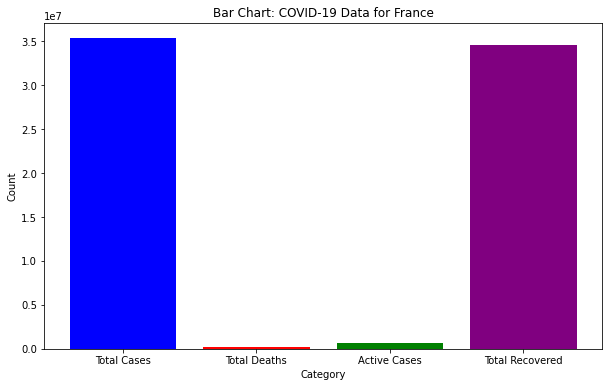

In [83]:
france_data = df[df['Country,\nOther'] == 'France']

france_total_cases = france_data['Total\nCases'].sum()
france_total_deaths = france_data['Total\nDeaths'].sum()
france_active_cases = france_data['Active\nCases'].sum()
france_total_recovered = france_data['Total\nRecovered'].sum()

labels_hist = ['Total Cases', 'Total Deaths', 'Active Cases', 'Total Recovered']
france_data_hist = [france_total_cases, france_total_deaths, france_active_cases, france_total_recovered]


colors = ['blue', 'red', 'green', 'purple']


plt.figure(figsize=(10, 6))
plt.bar(labels_hist, france_data_hist, color=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Chart: COVID-19 Data for France')
plt.show()

## Horizontal Bar Graph
plt.barh()

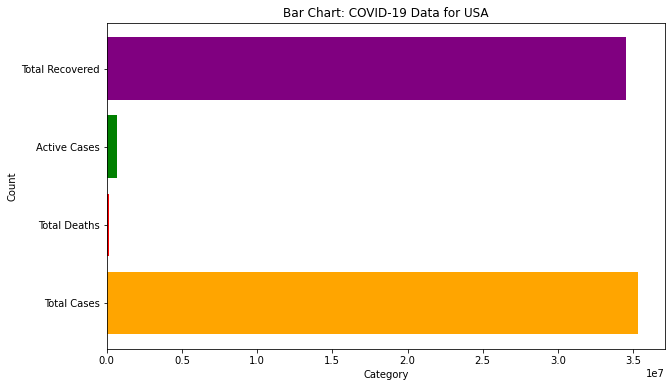

In [84]:
usa_data = df[df['Country,\nOther'] == 'USA']

france_total_cases = france_data['Total\nCases'].sum()
france_total_deaths = france_data['Total\nDeaths'].sum()
france_active_cases = france_data['Active\nCases'].sum()
france_total_recovered = france_data['Total\nRecovered'].sum()

labels_hist = ['Total Cases', 'Total Deaths', 'Active Cases', 'Total Recovered']
france_data_hist = [france_total_cases, france_total_deaths, france_active_cases, france_total_recovered]


colors = ['orange', 'red', 'green', 'purple']


plt.figure(figsize=(10, 6))
plt.barh(labels_hist, france_data_hist, color=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Chart: COVID-19 Data for USA')
plt.show()

In [85]:
#Let's separate variables
numerical_vars = ['Total/nCases','Total/nDeaths','Total/nTests','Serious,/nCritical', 'Total/nRecovered']
categorical_vars =['continent','Cov_zone','year']

### Scatter plot
- scatter plot is a diagram where each value i data set is represented by a dot
- the purpose of scatter plot is to display what happens to one variable when another variable is changed (relationship b/w two quantitive variables)
- plt.scatter()

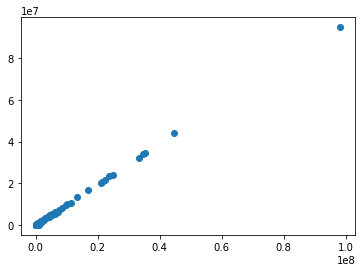

In [86]:
plt.scatter(df['Total\nCases'],df['Total\nRecovered'])

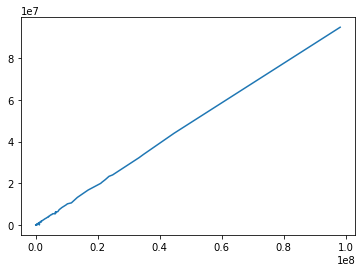

In [87]:
plt.plot(df['Total\nCases'],df['Total\nRecovered'])

### Piechart
- plt.pie()

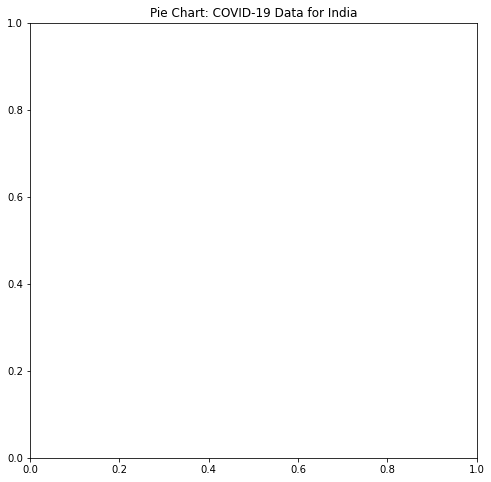

In [88]:
# Group the data by 'Country' and calculate the sum of 'TotalCases', 'TotalDeaths', and 'ActiveCases'
grouped_by_country = df.groupby('Country,\nOther')
sum_total_cases = grouped_by_country['Total\nCases'].sum()
sum_total_deaths = grouped_by_country['Total\nDeaths'].sum()
sum_active_cases = grouped_by_country['Active\nCases'].sum()
sum_critical_cases = grouped_by_country['Serious,\nCritical'].sum()
# Create separate DataFrames for each attribute
total_cases_df = pd.DataFrame({'Total\nCases': sum_total_cases})
total_deaths_df = pd.DataFrame({'Total\nDeaths': sum_total_deaths})
active_cases_df = pd.DataFrame({'Active\nCases': sum_active_cases})


India_total_cases = sum_total_cases['India']
India_total_deaths = sum_total_deaths['India']
India_active_cases = sum_active_cases['India']
India_data = [India_total_cases, India_total_deaths, India_active_cases]
labels = ['Total Cases', 'Total Deaths', 'Active Cases']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.title('Pie Chart: COVID-19 Data for India')
plt.show()

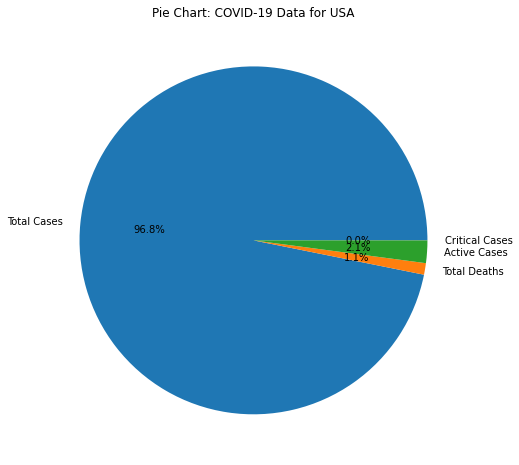

In [89]:
# Extract data for the USA
usa_total_cases = sum_total_cases['USA']
usa_total_deaths = sum_total_deaths['USA']
usa_active_cases = sum_active_cases['USA']
usa_critical_cases = sum_critical_cases['USA']


# Data for the pie chart
usa_data = [usa_total_cases, usa_total_deaths, usa_active_cases,usa_critical_cases]
labels = ['Total Cases', 'Total Deaths', 'Active Cases','Critical Cases']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(usa_data, labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart: COVID-19 Data for USA')
plt.show()

### Line Plot

<AxesSubplot:xlabel='Total\nCases', ylabel='Population'>

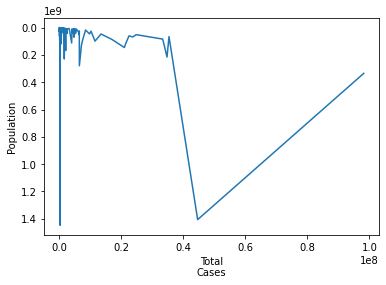

In [90]:
sns.lineplot(x='Total\nCases',y='Population',data=df)

<AxesSubplot:xlabel='Total\nCases'>

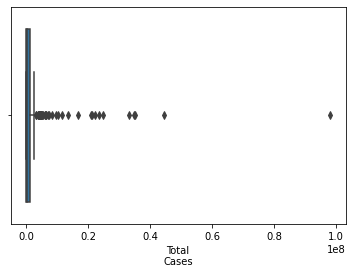

In [91]:
sns.boxplot(x=df['Total\nCases'])

<AxesSubplot:xlabel='Total\nCases'>

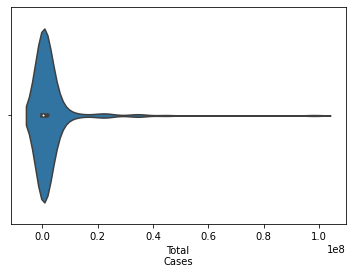

In [92]:
sns.violinplot(x=df['Total\nCases'])

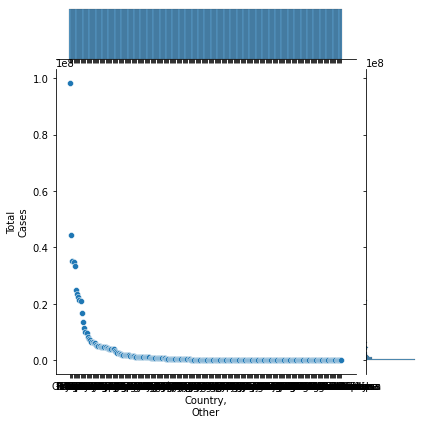

In [93]:
sns.jointplot(x=df['Country,\nOther'],y=df['Total\nCases'])

### Pairplot
- It displays multiple plots at a time in a single graph
- Pairwise Relationship
- Bydefault it return scatterplot
- sns.pairplot()

<Figure size 720x576 with 0 Axes>

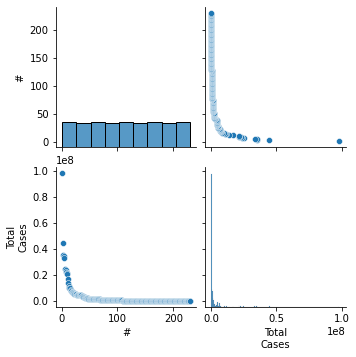

In [94]:
plt.figure(figsize=(10, 8))  # Set the figure size (optional)

# Use sns.pairplot() to create the pairplot
sns.pairplot(df)

# Show the pairplot
plt.show()

### Correlation HeatMap

<AxesSubplot:>

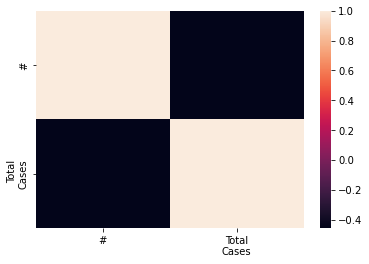

In [95]:
corr = df.corr()
sns.heatmap(corr)

Text(0.5, 1.0, 'Null Values Of the 2022 US College Rankings.csv DataSet')

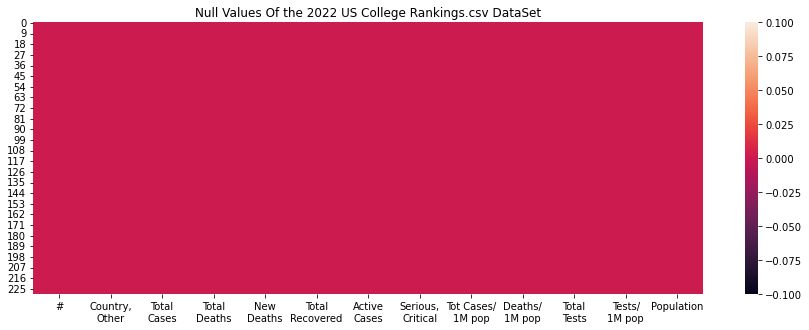

In [96]:
plt.figure(figsize=(15,5))
sns.heatmap(data=df.isnull())
plt.title("Null Values Of the 2022 US College Rankings.csv DataSet")

Text(0.5, 1.0, 'covid')

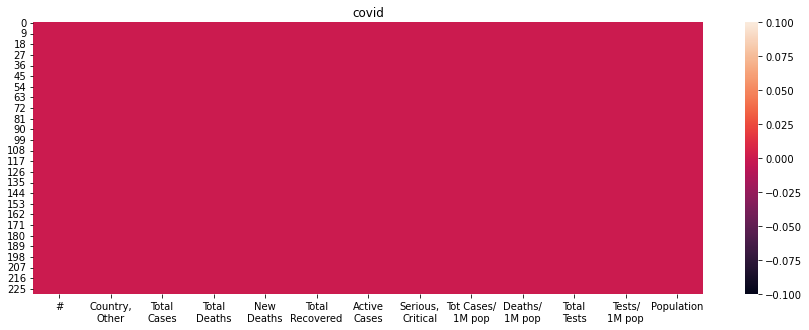

In [97]:
plt.figure(figsize=(15,5))
sns.heatmap(data=df.isnull())
plt.title("covid")

## End of the project